In [91]:
#importing libraries
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

In [92]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_64b2aa4633914bfb8249e0af6b33f075 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='FcpPiHgauZO3w6oTYP47_p5Mskuut6WruUTwpK_VhcHQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_64b2aa4633914bfb8249e0af6b33f075.get_object(Bucket='chronickidneydisease-donotdelete-pr-tjtdm1darw7w97',Key='chronickidneydisease.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [93]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [94]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [104]:
#drop id column
data.drop(["id"],axis=1,inplace=True)

In [105]:
#renaming column names
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [106]:
data.columns=['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','blood glucose random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetesmellitus','coronary_artery_disease','appetite','pedal_edema','anemia','class']

In [107]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [108]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood glucose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [109]:
#summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [12]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [110]:
#target column
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [111]:
#rectifying target column
data['class']=data['class'].replace("ckd\t","ckd")
data["class"].unique()

array(['ckd', 'notckd'], dtype=object)

In [112]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('float64'), dtype('O')], dtype=object), array([11, 14]))

In [113]:
#catagorical columns
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'anemia', 'appetite', 'red_blood_cell_count', 'bacteria', 'hypertension', 'red_blood_cells', 'pus_cell_clumps', 'coronary_artery_disease', 'pedal_edema', 'class', 'white_blood_cell_count', 'diabetesmellitus', 'packed_cell_volume', 'pus_cell'}


In [114]:
for i in catcols:
    print("columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')

columns: anemia
Counter({'no': 339, 'yes': 60, nan: 1})
************************************************************************************************************************

columns: appetite
Counter({'good': 317, 'poor': 82, nan: 1})
************************************************************************************************************************

columns: red_blood_cell_count
Counter({nan: 130, '5.2': 18, '4.5': 16, '4.9': 14, '4.7': 11, '3.9': 10, '4.8': 10, '4.6': 9, '3.4': 9, '3.7': 8, '5.0': 8, '6.1': 8, '5.5': 8, '5.9': 8, '3.8': 7, '5.4': 7, '5.8': 7, '5.3': 7, '4.3': 6, '4.2': 6, '5.6': 6, '4.4': 5, '3.2': 5, '4.1': 5, '6.2': 5, '5.1': 5, '6.4': 5, '5.7': 5, '6.5': 5, '3.6': 4, '6.0': 4, '6.3': 4, '4.0': 3, '4': 3, '3.5': 3, '3.3': 3, '5': 2, '2.6': 2, '2.8': 2, '2.5': 2, '3.1': 2, '2.1': 2, '2.9': 2, '2.7': 2, '3.0': 2, '2.3': 1, '8.0': 1, '3': 1, '2.4': 1, '\t?': 1})
***************************************************************************************************

In [115]:
#removing the columns which are not catagorical
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'anemia', 'appetite', 'bacteria', 'hypertension', 'red_blood_cells', 'pus_cell_clumps', 'coronary_artery_disease', 'pedal_edema', 'class', 'diabetesmellitus', 'pus_cell'}


In [116]:
#numerical columns
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'hemoglobin', 'blood_pressure', 'sugar', 'potassium', 'blood glucose random', 'serum_creatinine', 'age', 'albumin', 'sodium', 'specific_gravity', 'blood_urea'}


In [117]:
for i in contcols:
    print("continous columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')

continous columns: hemoglobin
Counter({15.0: 16, 10.9: 8, 9.8: 7, 11.1: 7, 13.0: 7, 13.6: 7, 11.3: 6, 10.3: 6, 12.0: 6, 13.9: 6, 15.4: 5, 11.2: 5, 10.8: 5, 9.7: 5, 12.6: 5, 7.9: 5, 10.0: 5, 14.0: 5, 14.3: 5, 14.8: 5, 12.2: 4, 12.4: 4, 12.5: 4, 15.2: 4, 9.1: 4, 11.9: 4, 13.5: 4, 16.1: 4, 14.1: 4, 13.2: 4, 13.8: 4, 13.7: 4, 13.4: 4, 17.0: 4, 15.5: 4, 15.8: 4, 9.6: 3, 11.6: 3, 9.5: 3, 9.4: 3, 12.7: 3, 9.9: 3, 10.1: 3, 8.6: 3, 11.0: 3, 15.6: 3, 8.1: 3, 8.3: 3, 10.4: 3, 11.8: 3, 11.4: 3, 11.5: 3, 15.9: 3, 14.5: 3, 16.2: 3, 14.4: 3, 14.2: 3, 16.3: 3, 16.5: 3, 15.7: 3, 16.4: 3, 14.9: 3, 15.3: 3, 17.8: 3, 12.1: 2, 9.3: 2, 10.2: 2, 10.5: 2, 6.0: 2, 11.7: 2, 8.0: 2, 12.3: 2, 8.7: 2, 13.1: 2, 8.8: 2, 13.3: 2, 14.6: 2, 16.9: 2, 16.0: 2, 14.7: 2, 16.6: 2, 16.7: 2, 16.8: 2, 15.1: 2, 17.1: 2, 17.2: 2, 17.4: 2, 5.6: 1, 7.6: 1, 7.7: 1, nan: 1, nan: 1, 12.9: 1, nan: 1, nan: 1, nan: 1, nan: 1, 6.6: 1, nan: 1, nan: 1, 7.5: 1, nan: 1, nan: 1, 4.8: 1, nan: 1, nan: 1, 7.1: 1, nan: 1, nan: 1, nan: 1, 9.2: 1, 

In [118]:
#removing the columns which are not numerical
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'hemoglobin', 'blood_pressure', 'potassium', 'blood glucose random', 'serum_creatinine', 'age', 'sodium', 'blood_urea'}


In [119]:
#adding columns which we found continous
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'hemoglobin', 'blood_pressure', 'red_blood_cell_count', 'potassium', 'blood glucose random', 'white_blood_cell_count', 'serum_creatinine', 'packed_cell_volume', 'age', 'sodium', 'blood_urea'}


In [120]:
#adding columns which we found numerical
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'anemia', 'sugar', 'appetite', 'bacteria', 'hypertension', 'red_blood_cells', 'pus_cell_clumps', 'coronary_artery_disease', 'pedal_edema', 'class', 'diabetesmellitus', 'pus_cell', 'albumin', 'specific_gravity'}


In [121]:
#rectifying the catagorical column classes
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [122]:
data['diabetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 137, 'no': 261, nan: 2})

In [123]:
#null values
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [27]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [124]:
#converting columns into numeric types
data.packed_cell_volume = pd.to_numeric(data.packed_cell_volume, errors='coerce')
data.white_blood_cell_count =  pd.to_numeric(data.white_blood_cell_count, errors ='coerce')
data.red_blood_cell_count = pd.to_numeric(data.red_blood_cell_count, errors='coerce')

In [29]:
#handiling numerical/continous column null values
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

In [125]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

In [126]:
data.isnull().sum().sum()

627

In [127]:
#label encoding
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus',
 'hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

In [33]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
    print("LABEL ENCODING OF:",i)
    LEi = LabelEncoder()
    print(c(data[i]))
    data[i]=LEi.fit_transform(data[i])
    print(c(data[i]))
    print('*'*100)

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 250, 'notckd': 150})
Counter({0: 250, 1: 150})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter(

### Data visualization

Text(0.5, 1.0, 'age vs blood scatter plot')

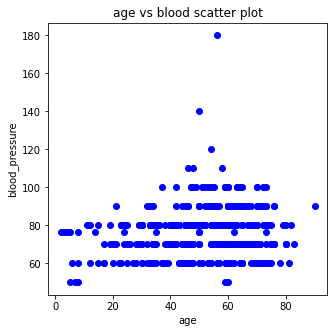

In [34]:
#Age vs Blood pressure
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood_pressure')
plt.title("age vs blood scatter plot")

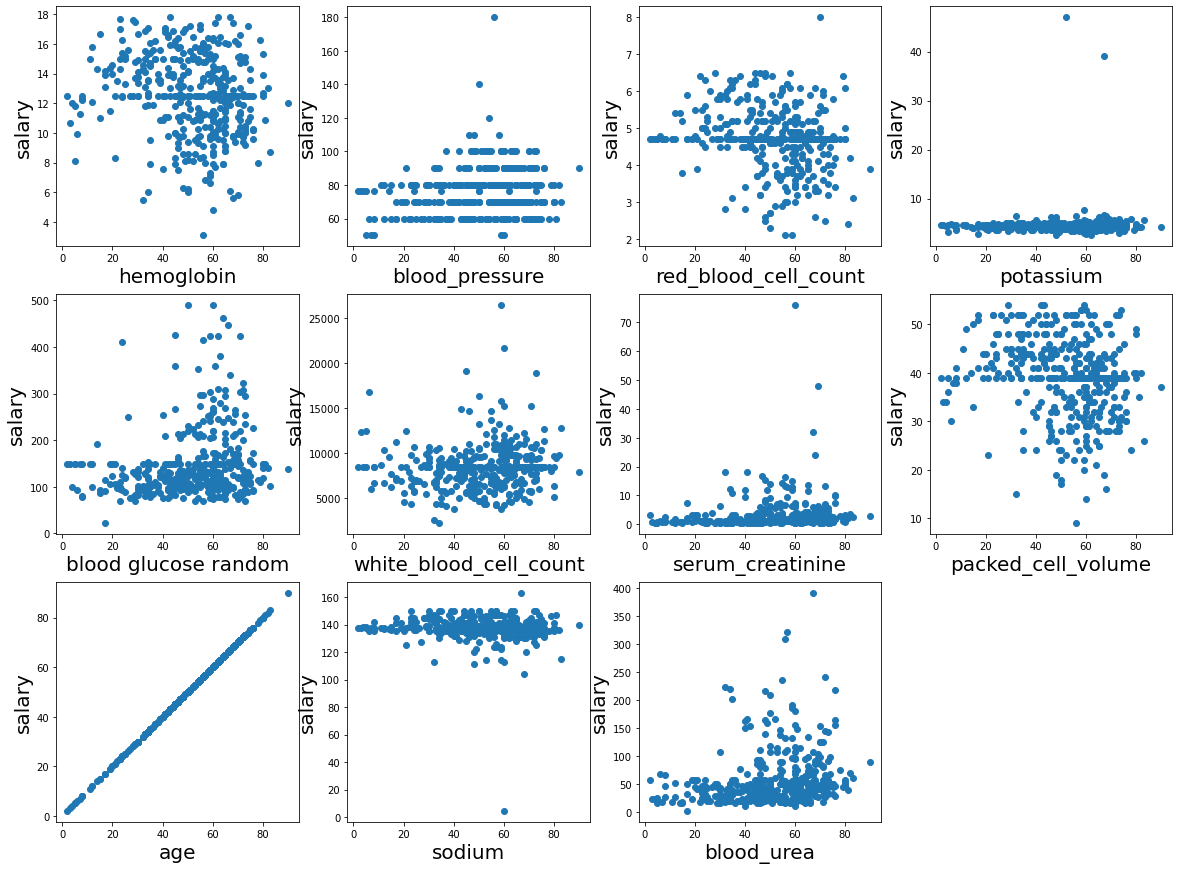

In [35]:
#Age vs all continous columns
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in contcols:
    if plotnumber<=11 :
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(data['age'],data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('salary',fontsize=20)
    plotnumber+=1
plt.show()

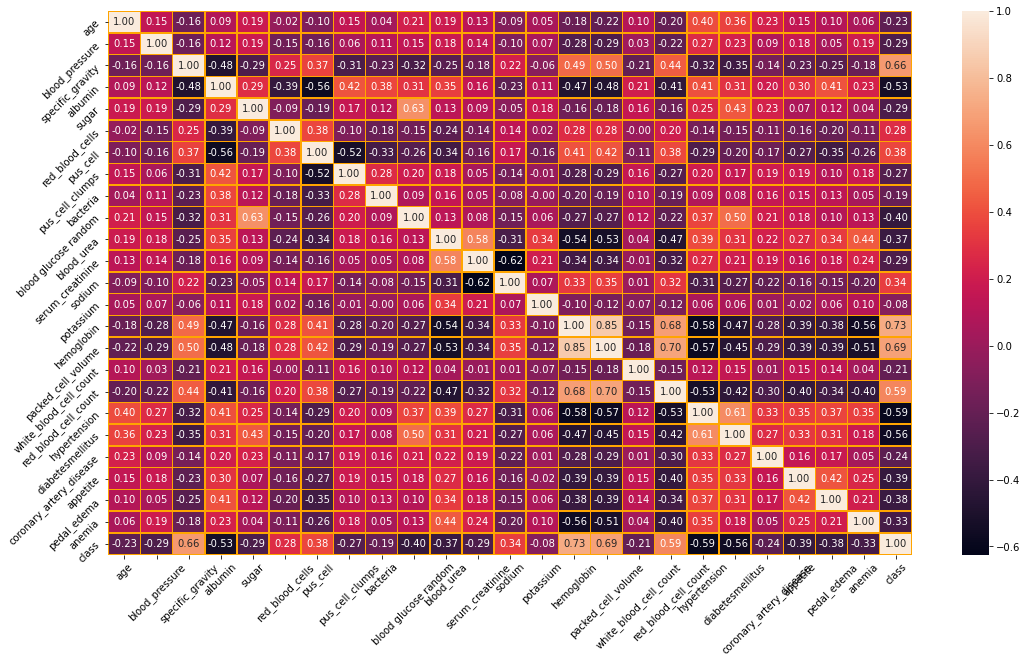

In [36]:
#finding correlation between the independent columns
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

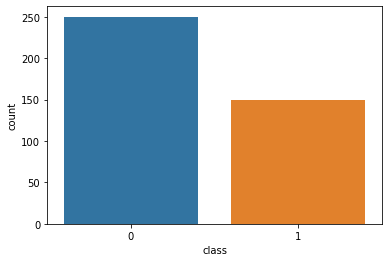

In [37]:
#class
sns.countplot(data['class'])

In [38]:
#creating independent and dependent
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [39]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 8)
(320, 1)
(80, 8)
(80, 1)


In [40]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
#test the model
y_pred = lgr.predict(x_test)

In [42]:
y_pred1 = lgr.predict([[129,99,1,0,0,1,0,1]])

print(y_pred)
c(y_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1
 0 1 0 1 1 0]


Counter({0: 48, 1: 32})

In [43]:
#model evaluation
accuracy_score(y_test,y_pred)

0.925

In [44]:
#confustion matrix of our model
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[48,  6],
       [ 0, 26]])

In [45]:
import ibm_watson_machine_learning

In [46]:
from ibm_watson_machine_learning import APIClient
import json

In [47]:
#authenticating and setting up the space
wml_credentials = {
    "apikey" : "9WKn2IB-NR6JLfkLXGqJdGvF2nD3DNVgDuqIwDs3gZsT", 
                   
    "url" : "https://us-south.ml.cloud.ibm.com"}

In [48]:
#checking for available space list
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------  ------------------------
ID                                    NAME            CREATED
640627a7-0db7-4287-aa13-3b459da9ef69  kidney_disease  2022-03-06T10:43:59.310Z
------------------------------------  --------------  ------------------------


In [49]:
SPACE_ID = "640627a7-0db7-4287-aa13-3b459da9ef69"

In [50]:
#setting the space in default
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [51]:
#saving the deploying the model
MODEL_NAME = "Kidney_Disease"
DEPLOYMENT_NAME = "kidney_disease"
BEST_MODEL =lgr

In [52]:
#setting python version
software_spec_uid = wml_client.software_specifications.get_id_by_name("default_py3.8")

#setup model meta+ model properties
model_props = {
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_0.23',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
}

In [53]:
#saving the model
model_details = wml_client.repository.store_model(
    model = BEST_MODEL,
    meta_props = model_props,
    training_data = x_train,
    training_target = y_train,
)

Failure during scoring. (POST https://us-south.ml.cloud.ibm.com/ml/v4/deployments/b6041104-cc44-4528-b32f-4ec0b5de8af2/predictions?version=2021-06-24)
Status code: 400, body: {"trace": "12db0d084313547e377bb1b02b02319a", "errors": [{"code": "invalid_input_data", "message": "Feature name mismatch. Feature name \"red_blood_cell\" not present in model schema", "target": {"type": "field", "name": "fields"}}], "status_code": 400}

Failure during scoring. (POST https://us-south.ml.cloud.ibm.com/ml/v4/deployments/b6041104-cc44-4528-b32f-4ec0b5de8af2/predictions?version=2021-06-24)
Status code: 400, body: {"trace": "0b6571dc70525808b7dfd9596d987c6b", "errors": [{"code": "invalid_input_data", "message": "Feature name mismatch. Feature name \"red_blood_cell\" not present in model schema", "target": {"type": "field", "name": "fields"}}], "status_code": 400}

Failure during scoring. (POST https://us-south.ml.cloud.ibm.com/ml/v4/deployments/b6041104-cc44-4528-b32f-4ec0b5de8af2/predictions?version=2

In [54]:
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [55]:
model_uid = wml_client.repository.get_model_id(model_details)

In [56]:
model_uid

'cf9c1b13-744e-4356-b7cf-bf9a16dab96a'

In [57]:
#deploying the model in ibm

#set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [58]:
deployment = wml_client.deployments.create(artifact_uid=model_uid,meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: 'cf9c1b13-744e-4356-b7cf-bf9a16dab96a' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='b6041104-cc44-4528-b32f-4ec0b5de8af2'
------------------------------------------------------------------------------------------------




In [59]:
deployment_uid = wml_client.deployments.get_uid(deployment)
deployment_uid

'b6041104-cc44-4528-b32f-4ec0b5de8af2'

In [73]:
payload = {"input_data": [{"fields": x_test.columns.to_numpy().tolist(), "values": x_test.to_numpy().tolist()}]}

In [128]:
payload = {"input_data":[{"fields": ['blood_urea','blood glucose random','anemia','coronary_artery_disease','pus_cell','red_blood_cells','diabetesmellitus','pedal_edema'],
                           "values": [[3.1,1.0,0,0,0,1.0,1.0,1.0]]}]}

In [129]:
result = wml_client.deployments.score(deployment_uid,payload)

In [131]:
result

{'predictions': [{'fields': ['prediction', 'probability'],
   'values': [[1, [0.03214085541919032, 0.9678591445808097]]]}]}